In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../data/newsData/raw_analyst_ratings.csv')  

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (1407328, 6)

First few rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Display basic information
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names and Types:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nBasic Statistics:")
df.describe()

DATASET INFORMATION

Dataset Shape: 1407328 rows × 6 columns

Column Names and Types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

Missing Values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

Basic Statistics:


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [4]:
# Examine the structure based on the challenge document
print("Sample of each column:")
print("\nHeadline:", df['headline'].iloc[0] if 'headline' in df.columns else "Column not found")
print("\nURL:", df['url'].iloc[0] if 'url' in df.columns else "Column not found")
print("\nPublisher:", df['publisher'].iloc[0] if 'publisher' in df.columns else "Column not found")
print("\nDate:", df['date'].iloc[0] if 'date' in df.columns else "Column not found")
print("\nStock:", df['stock'].iloc[0] if 'stock' in df.columns else "Column not found")

Sample of each column:

Headline: Stocks That Hit 52-Week Highs On Friday

URL: https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday

Publisher: Benzinga Insights

Date: 2020-06-05 10:30:54-04:00

Stock: A


 #### Headline Length Analysis

HEADLINE LENGTH STATISTICS

Mean length: 73.12 characters
Median length: 64.00 characters
Min length: 3 characters
Max length: 512 characters
Std deviation: 40.74 characters


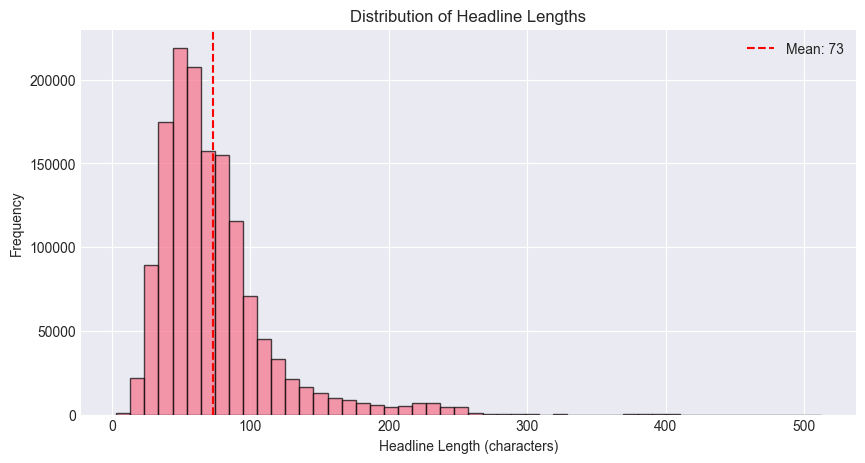

In [5]:
# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()

print("=" * 50)
print("HEADLINE LENGTH STATISTICS")
print("=" * 50)
print(f"\nMean length: {df['headline_length'].mean():.2f} characters")
print(f"Median length: {df['headline_length'].median():.2f} characters")
print(f"Min length: {df['headline_length'].min()} characters")
print(f"Max length: {df['headline_length'].max()} characters")
print(f"Std deviation: {df['headline_length'].std():.2f} characters")

# Visualize
plt.figure(figsize=(10, 5))
plt.hist(df['headline_length'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.axvline(df['headline_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["headline_length"].mean():.0f}')
plt.legend()
plt.show()

#### Publisher Analysis

PUBLISHER ANALYSIS

Total unique publishers: 1034

Top 15 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Name: count, dtype: int64


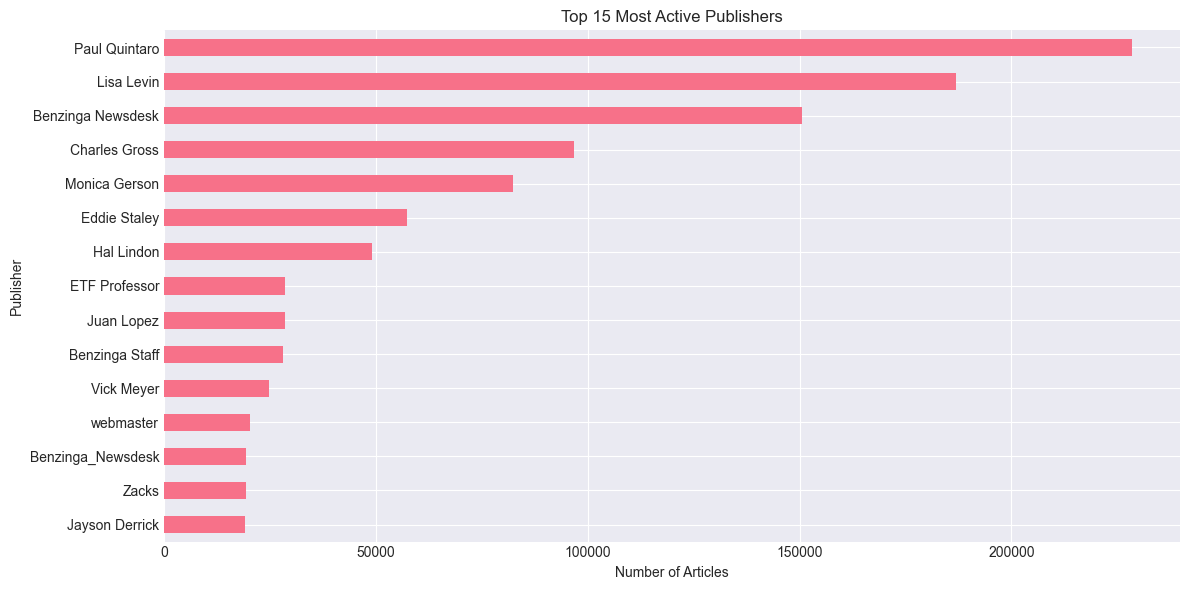

In [6]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

print("=" * 50)
print("PUBLISHER ANALYSIS")
print("=" * 50)
print(f"\nTotal unique publishers: {df['publisher'].nunique()}")
print(f"\nTop 15 Most Active Publishers:")
print(publisher_counts.head(15))

# Visualize top 15 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(15).plot(kind='barh')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.title('Top 15 Most Active Publishers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 #### Parse and Analyze Dates

In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

print("=" * 50)
print("DATE ANALYSIS")
print("=" * 50)
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
print(f"\nTotal days covered: {(df['date'].max() - df['date'].min()).days} days")

# Articles per day of week
print("\nArticles by Day of Week:")
print(df['day_of_week'].value_counts().sort_index())

DATE ANALYSIS

Date range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00

Total days covered: 3332 days

Articles by Day of Week:
day_of_week
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
Name: count, dtype: int64


#### Publication Frequency Over Time

TIME SERIES ANALYSIS

Average articles per day: 22.15
Max articles in a day: 973
Min articles in a day: 1


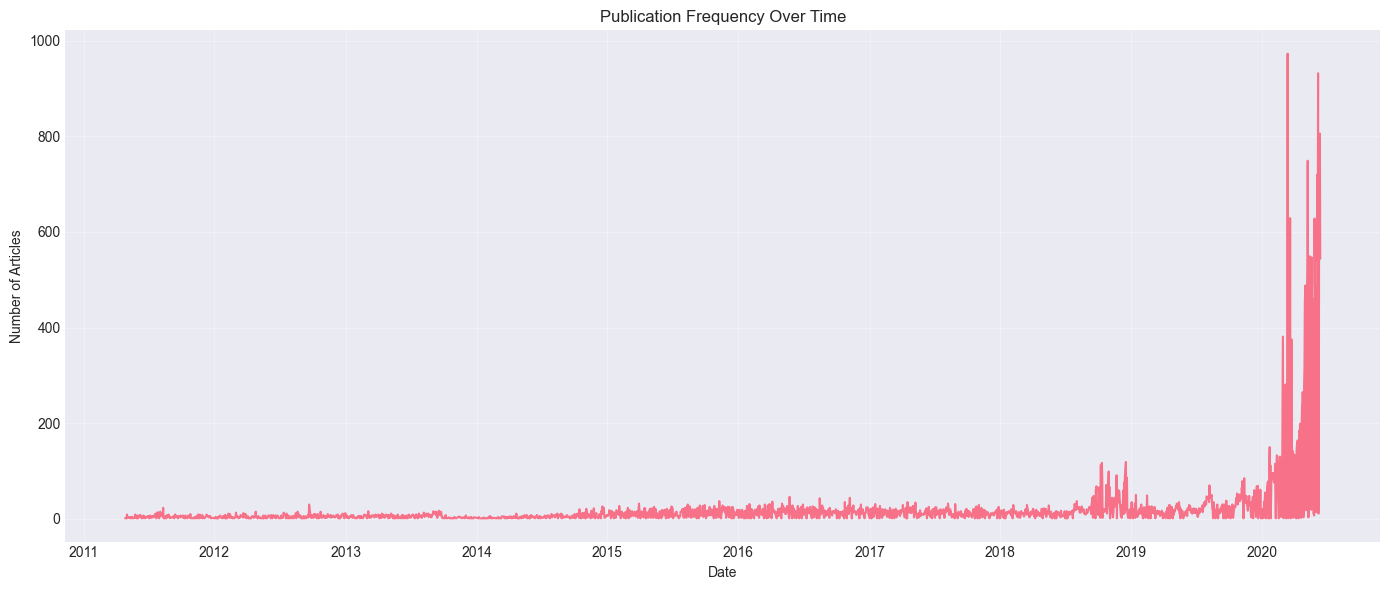

In [8]:
# Articles per day
articles_per_day = df.groupby(df['date'].dt.date).size()

print("=" * 50)
print("TIME SERIES ANALYSIS")
print("=" * 50)
print(f"\nAverage articles per day: {articles_per_day.mean():.2f}")
print(f"Max articles in a day: {articles_per_day.max()}")
print(f"Min articles in a day: {articles_per_day.min()}")

# Plot time series
plt.figure(figsize=(14, 6))
articles_per_day.plot()
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Publication Times (Hour of Day)


Publication Times (Hour of Day):
hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64


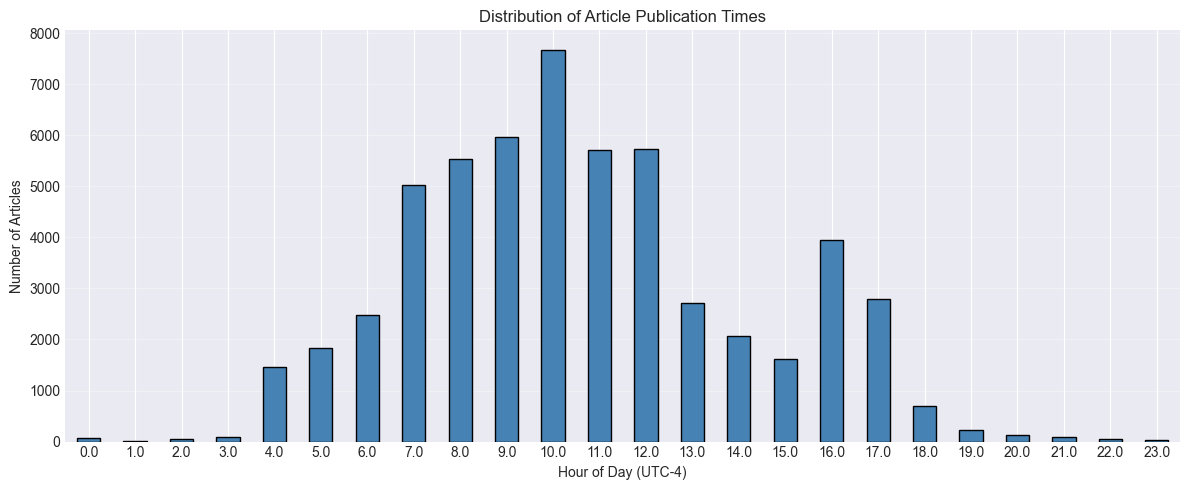


Peak publication hour: 10.0:00


In [9]:
# Articles by hour
hour_distribution = df['hour'].value_counts().sort_index()

print("\nPublication Times (Hour of Day):")
print(hour_distribution)

plt.figure(figsize=(12, 5))
hour_distribution.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Hour of Day (UTC-4)')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Publication Times')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nPeak publication hour: {hour_distribution.idxmax()}:00")

#### Identify Spikes

In [10]:
# Find days with unusually high article counts
threshold = articles_per_day.mean() + 2 * articles_per_day.std()
spike_days = articles_per_day[articles_per_day > threshold]

print("\nDays with Unusual Activity (>2 std above mean):")
for date, count in spike_days.items():
    print(f"{date}: {count} articles")


Days with Unusual Activity (>2 std above mean):
2020-02-27: 275 articles
2020-02-28: 381 articles
2020-03-06: 281 articles
2020-03-11: 282 articles
2020-03-12: 973 articles
2020-03-19: 629 articles
2020-03-23: 375 articles
2020-03-24: 160 articles
2020-04-09: 164 articles
2020-04-13: 184 articles
2020-04-15: 186 articles
2020-04-16: 199 articles
2020-04-17: 194 articles
2020-04-20: 180 articles
2020-04-21: 233 articles
2020-04-22: 245 articles
2020-04-23: 265 articles
2020-04-24: 246 articles
2020-04-27: 283 articles
2020-04-28: 317 articles
2020-04-29: 449 articles
2020-04-30: 488 articles
2020-05-01: 385 articles
2020-05-04: 347 articles
2020-05-05: 478 articles
2020-05-06: 531 articles
2020-05-07: 749 articles
2020-05-08: 508 articles
2020-05-11: 485 articles
2020-05-12: 387 articles
2020-05-13: 549 articles
2020-05-14: 536 articles
2020-05-15: 322 articles
2020-05-18: 547 articles
2020-05-19: 332 articles
2020-05-20: 461 articles
2020-05-21: 333 articles
2020-05-22: 286 articles
2